In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from env.env_gym import GuestEnv

In [2]:
def run_env(env, actions, steps=200, seed=42):
    obs, info = env.reset(seed=seed)
    phonemes, rewards = [], []
    for i in range(steps):
        act = actions[i] if i < len(actions) else actions[-1]
        obs, reward, terminated, truncated, info = env.step(act)
        phonemes.append(info['phoneme'].copy())
        rewards.append(reward)
        if terminated or truncated:
            break
    return np.array(phonemes), np.array(rewards)

def plot_results(phonemes, rewards, title):
    steps = np.arange(len(rewards))
    plt.figure(figsize=(9,4))
    for a in range(phonemes.shape[1]):
        plt.plot(steps, phonemes[:, a], label=f'Agent {a}')
    plt.xlabel('Step'); plt.ylabel('Phonemes'); plt.title(title + ' - Phonemes')
    plt.legend(); plt.grid(True); plt.show()
    plt.figure(figsize=(9,4))
    plt.plot(steps, rewards, label='Reward')
    plt.xlabel('Step'); plt.ylabel('Reward'); plt.title(title + ' - Reward')
    plt.grid(True); plt.show()

In [3]:
# Create environment
env = GuestEnv(max_steps=100, reward_shaping=False)  # Shorter episodes for more frequent logging

# Update agent parameters
env.agent_params[0].update({
    'min_energy_to_speak': 0.6,
    'energy_gain': 0.01,
    'energy_decay': 0.15,
    'max_speaking_time': 2,
    'phonemes_per_step': 1
})
env.agent_params[1].update({
    'min_energy_to_speak': 0.3,
    'energy_gain': 0.05,
    'energy_decay': 0.10,
    'max_speaking_time': 5,
    'phonemes_per_step': 2
})
env.agent_params[2].update({
    'min_energy_to_speak': 0.1,
    'energy_gain': 0.10,
    'energy_decay': 0.05,
    'max_speaking_time': 8,
    'phonemes_per_step': 4
})
actions = [0]*200
p, r = run_env(env, actions)

2025-09-17 00:00:30 | ERROR | An error has been caught in function 'run_env', process 'MainProcess' (15706), thread 'MainThread' (8772149440):
Traceback (most recent call last):

  File "/Users/ofir/.pyenv/versions/3.10.15/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x1030bed90, file "/Users/ofir/.pyenv/versions/3.10.15/envs/guest/lib/python3.10/site-packages/ipyke...
           └ <function _run_code at 0x1030cb520>
  File "/Users/ofir/.pyenv/versions/3.10.15/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
         └ <code object <module> at 0x1030bed9

TypeError: cannot unpack non-iterable NoneType object

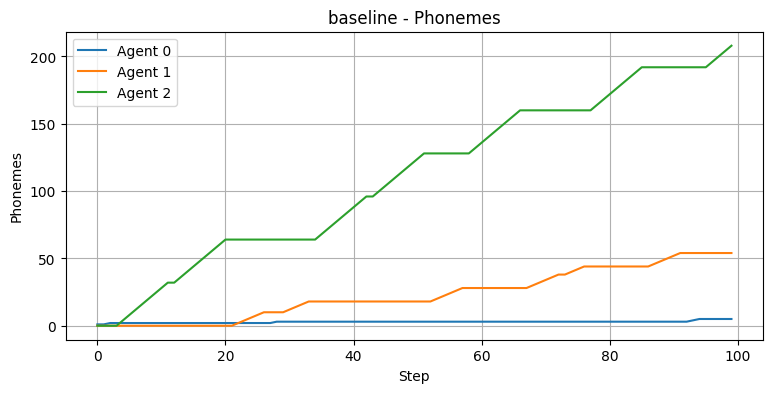

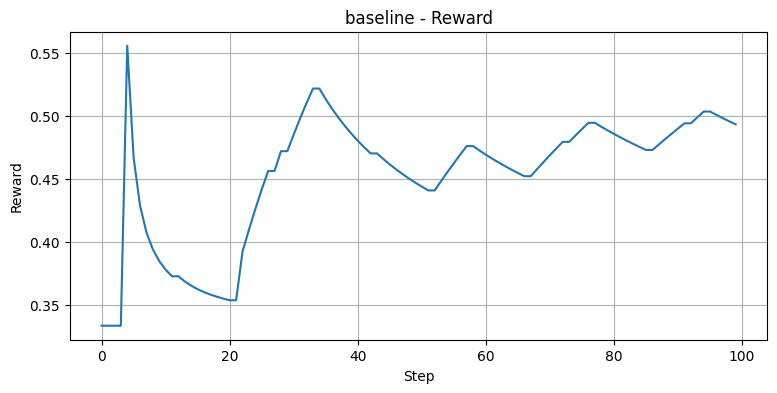

In [ ]:
plot_results(p, r, 'baseline')